In [75]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing

In [76]:
df_book_metadata = pd.read_csv('data/books_v2.csv')
df_book_metadata = df_book_metadata.dropna(subset=['description'])
# pick first 2000 books
df_book_metadata = df_book_metadata[:2000]

# del df_book_metadata['index']

df_book_metadata.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [77]:
descriptions = df_book_metadata['description'].values
genres = df_book_metadata['genres'].values

In [78]:
def extract_unique_genres(genres_arr):
    genres = []
    for i in genres_arr:
        i = eval(i)
        genres.extend(i)
    return list(set(genres))

def create_genre_one_hot(row, genres=None):
    for i in eval(row['genres']):
        row[i] = 1
    return row

unique_genres = extract_unique_genres(genres)
unique_genres

['Comic Fantasy',
 '20th Century',
 'Czech Literature',
 'Israel',
 'Hard Boiled',
 'Humor',
 'Danish',
 'Sweden',
 'Christian Romance',
 'Presidents',
 'Science Fiction Fantasy',
 'Geography',
 'Lds',
 'Childrens',
 'Portugal',
 'Victorian',
 'Technology',
 'Music',
 'War',
 'Fantasy',
 'African Literature',
 'New York',
 'Skepticism',
 'Short Stories',
 'Genetics',
 'Judaism',
 'Horror',
 'Buisness',
 'Historical',
 'Jewish',
 'Japan',
 'American Civil War',
 'Murder Mystery',
 'Crime',
 'Anime',
 'Aspergers',
 'Dogs',
 'French Revolution',
 'Gardening',
 'Fae',
 '18th Century',
 'Witches',
 'Islam',
 'Christian Living',
 'Political Science',
 'Dystopia',
 'Beauty and The Beast',
 'French Literature',
 'Fighters',
 'Monsters',
 'New Age',
 'Womens',
 'Conspiracy Theories',
 'Astronomy',
 'Linguistics',
 'Urban Fantasy',
 'Psychological Thriller',
 'True Story',
 'Politics',
 'Productivity',
 'Japanese Literature',
 'Forgotten Realms',
 'Pirates',
 'Epic Fantasy',
 'Fashion',
 'Middle

In [79]:
# generate one hot encoding for genres
genres_one_hot = np.zeros((len(genres), len(unique_genres)))
for i, genre in enumerate(genres):
    genre = eval(genre)
    for j in genre:
        genres_one_hot[i, unique_genres.index(j)] = 1

genres_one_hot.shape

(2000, 424)

## Text Preprocessing

In [80]:
import pickle
import numpy as np 
import pandas as pd
import seaborn as sns     
from datetime import datetime    
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tensorflow.keras.utils import plot_model

import re, os
os.environ["SM_FRAMEWORK"] = "tf.keras"                      

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
    
import tensorflow as tf     
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dropout, LSTM, Bidirectional, Dense, Embedding, BatchNormalization, GRU

np.random.seed(1234)
tf.random.set_seed(1234)

print('Tensorflow version : ', tf.__version__)

Tensorflow version :  2.6.0


In [81]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    for i in range(len(physical_devices)):
        tf.config.experimental.set_memory_growth(physical_devices[i], True)
    print("Consuming GPU for Training.") 
    
else:
    print("WARNING: Could not find GPU! Using CPU only.")

Consuming GPU for Training.


In [82]:
lemmatizer = WordNetLemmatizer()
re_tokenizer = RegexpTokenizer(r'\w+')
stopwords_list = stopwords.words('english')

oov_token = '<OOV>'
pad_token = '<PAD>'

In [83]:
def lemmatization(lemmatizer,sentence):
    lem = [lemmatizer.lemmatize(k) for k in sentence]
    return [k for k in lem if k]

def remove_stop_words(stopwords_list,sentence):
    return [k for k in sentence if k not in stopwords_list]

def preprocess_one(description):
    description = description.lower()
    remove_punc = re_tokenizer.tokenize(description) # Remove puntuations
    remove_num = [re.sub('[0-9]', '', i) for i in remove_punc] # Remove Numbers
    remove_num = [i for i in remove_num if len(i)>0] # Remove empty strings
    lemmatized = lemmatization(lemmatizer,remove_num) # Word Lemmatization
    remove_stop = remove_stop_words(stopwords_list,lemmatized) # remove stop words
    updated_description = ' '.join(remove_stop)
    return updated_description

def preprocessed_data(descriptions):
    updated_descriptions = []
    if isinstance(descriptions, np.ndarray) or isinstance(descriptions, list):
        updated_descriptions = [preprocess_one(description) for description in descriptions]
    elif isinstance(descriptions, np.str_)  or isinstance(descriptions, str):
        updated_descriptions = [preprocess_one(descriptions)]

    return np.array(updated_descriptions)

In [84]:
def create_wordcloud(processed_descriptions):
    long_string = ','.join(list(processed_descriptions))
    plt.rcParams['figure.figsize'] = (20, 20)
    wordcloud = WordCloud(
                        width=2000, 
                        height=1200, 
                        max_words=200, 
                        background_color='white',
                        max_font_size=200, 
                        random_state=1234
                        )
    wordcloud.generate(long_string)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("WordCloud Distribution of Book Descriptions")
    plt.show()

def vis_length_variation(X_SEQ):
    X_len = [len(i) for i in X_SEQ]
    X_len = pd.Series(X_len)
    X_len.hist()
    plt.xlabel('Token Length')
    plt.ylabel('Samples')
    plt.title('Token Length Variation')
    plt.show()
    
    print(X_len.describe())

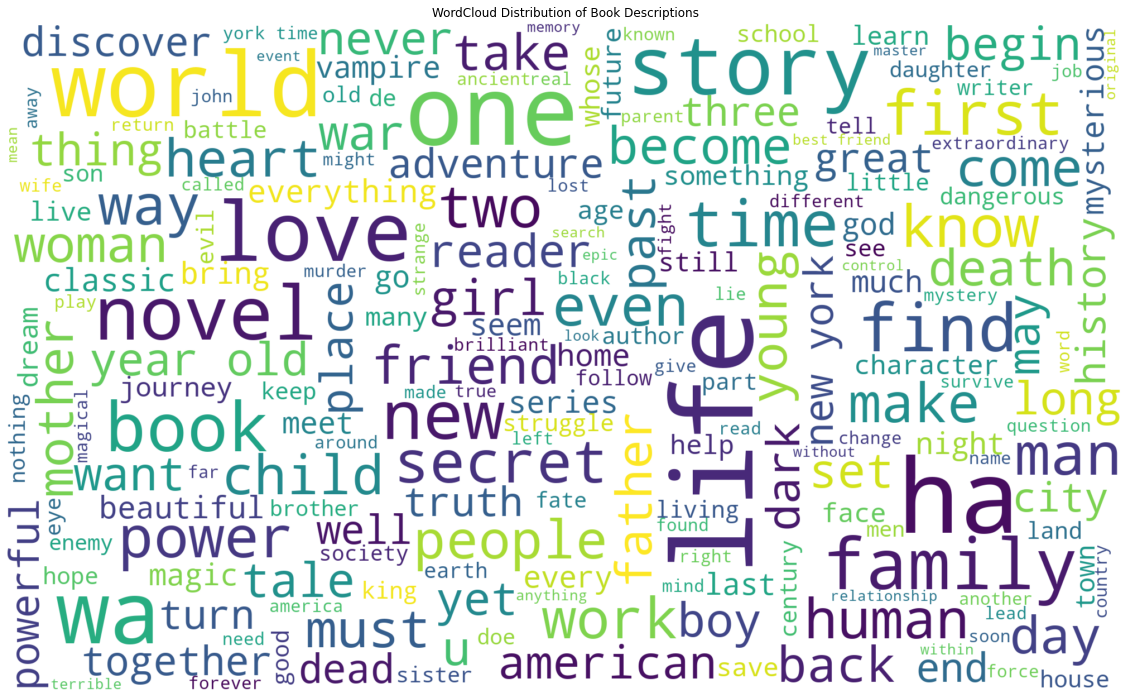

In [85]:
preprocessed_descriptions = preprocessed_data(descriptions)
create_wordcloud(preprocessed_descriptions)

In [86]:
tokenizer_path = 'weights/TOKENIZER.pkl'
model_weights = 'weights/DESCRIPTION_SIMILARITY.h5'

In [87]:
if not os.path.exists(tokenizer_path):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<oov>')
    tokenizer.fit_on_texts(preprocessed_descriptions)
    
    with open(tokenizer_path, 'wb') as fp:
        pickle.dump(tokenizer, fp, protocol=pickle.HIGHEST_PROTOCOL)
        
else:
    with open(tokenizer_path, 'rb') as fp:
        tokenizer = pickle.load(fp)

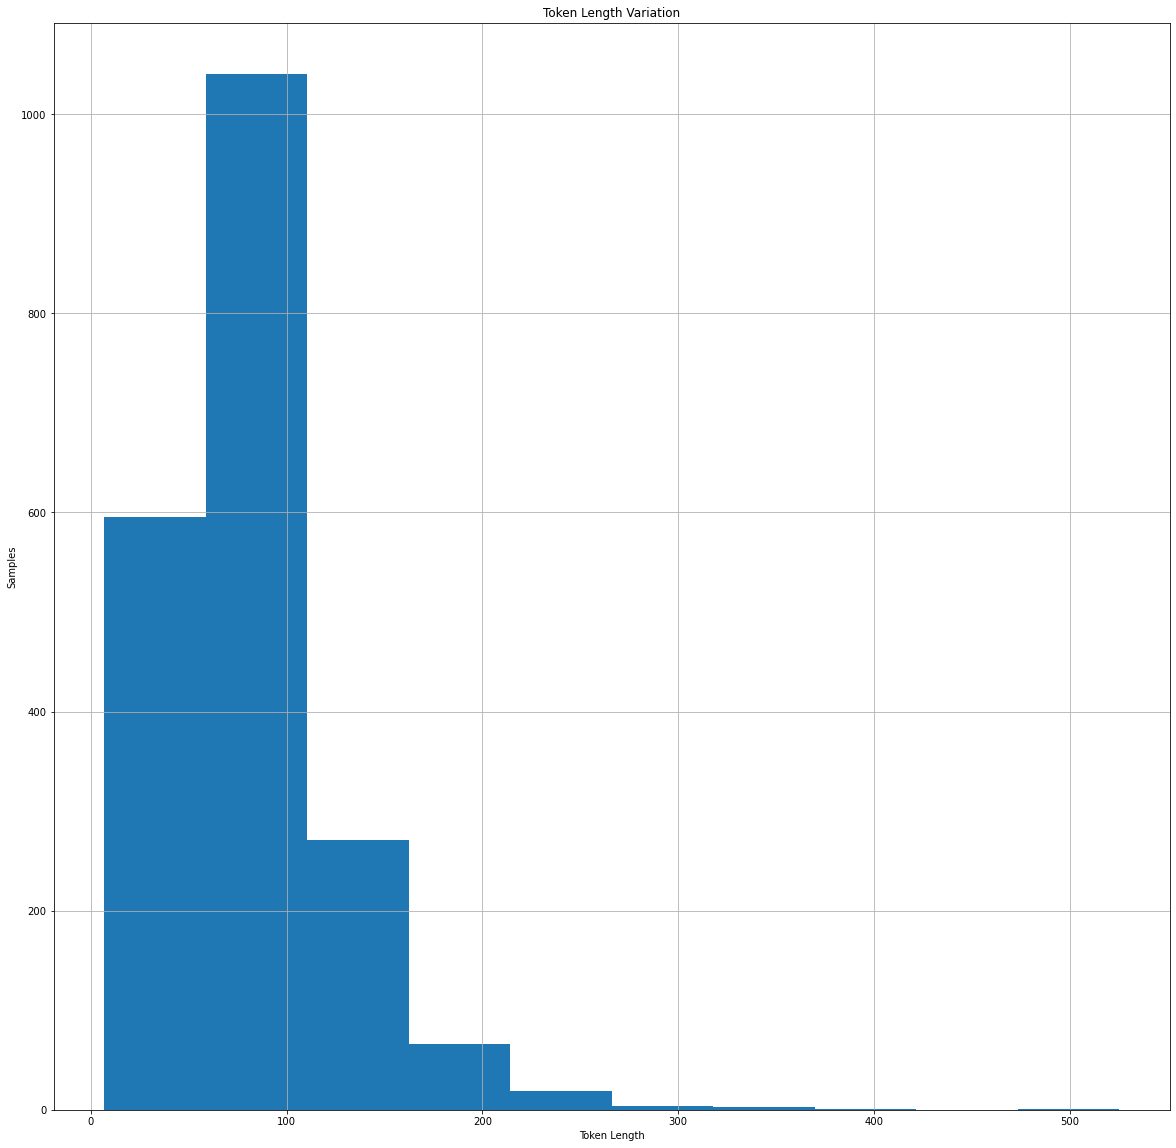

count    2000.000000
mean       82.443000
std        42.918315
min         7.000000
25%        54.000000
50%        75.000000
75%       100.000000
max       525.000000
dtype: float64


In [88]:
X_seq = tokenizer.texts_to_sequences(preprocessed_descriptions) # tokenize train data
vis_length_variation(X_seq)

In [89]:
max_length = 300
embedding_dim = 100

In [90]:
X_pad = pad_sequences(
                    X_seq, 
                    maxlen=max_length, 
                    padding='pre', 
                    truncating='pre'
                    )

vocab_size = len(tokenizer.word_index) + 1

## Build Model

In [91]:
inputs = Input(shape=(max_length,))
x = Embedding(vocab_size, embedding_dim, input_length=max_length)(inputs)
x = Bidirectional(LSTM(128, return_sequences=True))(x)
x = Bidirectional(LSTM(64, return_sequences=False))(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)

outputs = []
for i in unique_genres:
    x_i = Dense(1, activation='sigmoid')(x)
    outputs.append(x_i)

model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 300, 100)     2233800     input_7[0][0]                    
__________________________________________________________________________________________________
bidirectional_12 (Bidirectional (None, 300, 256)     234496      embedding_6[0][0]                
__________________________________________________________________________________________________
bidirectional_13 (Bidirectional (None, 128)          164352      bidirectional_12[0][0]           
____________________________________________________________________________________________

## Train Model

In [92]:
model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=[
                    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                    tf.keras.metrics.Precision(name='precision'),
                    tf.keras.metrics.Recall(name='recall'),
                    tf.keras.metrics.AUC(name='auc')
            ]
)

Y = []
for i in range(len(unique_genres)):
    Y.append(genres_one_hot[:,i])

history = model.fit(
                    X_pad,
                    Y,
                    epochs=50,
                    batch_size=64
                    )

Epoch 1/50
32/32 [==============================] - 443s 3s/step - loss: 276.5806 - dense_3384_loss: 0.4824 - dense_3385_loss: 0.5102 - dense_3386_loss: 0.5749 - dense_3387_loss: 0.6245 - dense_3388_loss: 0.4144 - dense_3389_loss: 0.7670 - dense_3390_loss: 0.6781 - dense_3391_loss: 0.7983 - dense_3392_loss: 0.6171 - dense_3393_loss: 0.3997 - dense_3394_loss: 0.6649 - dense_3395_loss: 0.6190 - dense_3396_loss: 0.6277 - dense_3397_loss: 0.7996 - dense_3398_loss: 0.7729 - dense_3399_loss: 0.5971 - dense_3400_loss: 0.6532 - dense_3401_loss: 0.7562 - dense_3402_loss: 0.6374 - dense_3403_loss: 0.7142 - dense_3404_loss: 0.6899 - dense_3405_loss: 0.6960 - dense_3406_loss: 0.6046 - dense_3407_loss: 0.6721 - dense_3408_loss: 0.5708 - dense_3409_loss: 0.4425 - dense_3410_loss: 0.7140 - dense_3411_loss: 0.8076 - dense_3412_loss: 0.8783 - dense_3413_loss: 0.7599 - dense_3414_loss: 0.5522 - dense_3415_loss: 0.5989 - dense_3416_loss: 0.7643 - dense_3417_loss: 0.6843 - dense_3418_loss: 0.8287 - dense_

In [93]:
# fig, ax = plt.subplots(4, 4, figsize=(30, 30))
# for i, genre in enumerate(unique_genres):
#     ax[i//4, i%4].plot(history.history[genre+'_accuracy'], label='accuracy')
#     ax[i//4, i%4].plot(history.history[genre+'_precision'], label='precision')
#     ax[i//4, i%4].plot(history.history[genre+'_recall'], label='recall')
#     ax[i//4, i%4].plot(history.history[genre+'_auc'], label='auc')
#     ax[i//4, i%4].legend()
#     ax[i//4, i%4].set_title(genre)

# plt.show()

## Inference base model

In [94]:
description = 'mayflower set sail carried board men woman would shape america mile standish john alden constance hopkins among pilgrim pure heart escaping religious persecution indeed even human vampire vampire assimilated quickly new world rising level enormous power wealth influence celebrated blue blood american society'

if description:
    description = preprocessed_data(description)
    d_seq = tokenizer.texts_to_sequences(description)
    d_pad = pad_sequences(
                        d_seq, 
                        maxlen=max_length, 
                        padding='pre', 
                        truncating='pre'
                        )
    pred = model.predict(d_pad)
    pred = np.array(pred).reshape(-1)
    pred = np.where(pred > 0.5, 1, 0)
    print('Predicted Genres: ', np.array(unique_genres)[pred==1])

Predicted Genres:  ['Fantasy' 'Urban Fantasy' 'Fiction' 'Young Adult' 'Paranormal'
 'Paranormal Romance' 'Vampires' 'Romance' 'Supernatural']


# Create Feature Model

In [95]:
feature_model = Model(
                    inputs=model.input, 
                    outputs=model.layers[3].output
                    )
feature_model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 300, 100)          2233800   
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 300, 256)          234496    
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 128)               164352    
Total params: 2,632,648
Trainable params: 2,632,648
Non-trainable params: 0
_________________________________________________________________


In [96]:
feature_model.save(model_weights)

# Save Features

In [97]:
book_ids = df_book_metadata['bookId'].values
book_features = feature_model.predict(X_pad)

np.savez(
        'weights/BOOK_FEATURES.npz',
        book_ids=book_ids,
        book_features=book_features
        )

In [98]:
# cosine similarity scikit-learn
from sklearn.metrics.pairwise import cosine_similarity

In [99]:
def extract_similar_books(
                        description, 
                        book_features, 
                        book_ids,
                        top_n=10
                        ):
    description = preprocessed_data(description)
    d_seq = tokenizer.texts_to_sequences(description)
    d_pad = pad_sequences(
                        d_seq,
                        maxlen=max_length,
                        padding='pre',
                        truncating='pre'
                        )
    fpred = feature_model.predict(d_pad)
    fpred = fpred.reshape(1, -1)
    sim = cosine_similarity(fpred, book_features)
    sim = sim.reshape(-1)
    sim = np.argsort(sim)[::-1]
    return book_ids[sim[:top_n]]


In [100]:
extract_similar_books(
                    "WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America lies the nation of Panem, a shining Capitol surrounded by twelve outlying districts. The Capitol is harsh and cruel and keeps the districts in line by forcing them all to send one boy and once girl between the ages of twelve and eighteen to participate in the annual Hunger Games, a fight to the death on live TV.Sixteen-year-old Katniss Everdeen regards it as a death sentence when she steps forward to take her sister's place in the Games. But Katniss has been close to dead beforeâ€”and survival, for her, is second nature. Without really meaning to, she becomes a contender. But if she is to win, she will have to start making choices that weight survival against humanity and life against love.",
                    book_features,
                    book_ids
                    )

array(['2767052-the-hunger-games', '10626594-the-scorpio-races',
       '3165162-percy-jackson-and-the-olympians',
       '9917938-blood-red-road', '16077824-dream-caster', '2986865-eon',
       '33590260-kingdom-of-ash', '13836.Wild_Magic',
       '18006496-queen-of-shadows', '36381037-cinder'], dtype=object)